# COCO to Yolo format converter

In [18]:
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import glob
import cv2

from pycocotools.coco import COCO

### Checking data json

In [2]:
file_json = open('instances_default_train.json')

In [3]:
data = json.load(file_json)

In [4]:
file_json.close()

In [5]:
for i in data:
    print(i)

licenses
info
categories
images
annotations


In [6]:
for i in data['licenses']:
    print(i)

{'name': '', 'id': 0, 'url': ''}


In [7]:
for i in data['info']:
    print(i)

contributor
date_created
description
url
version
year


In [8]:
for i in data['categories']:
    print(i)

{'id': 1, 'name': 'alpha_decay', 'supercategory': ''}
{'id': 2, 'name': 'detector_effects', 'supercategory': ''}
{'id': 3, 'name': 'natural_bckg', 'supercategory': ''}


In [9]:
for i in data['images']:
    print(i)

{'id': 1, 'width': 470, 'height': 512, 'file_name': 'R025_00136.10.png', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}
{'id': 2, 'width': 470, 'height': 512, 'file_name': 'R025_00135.10.png', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}
{'id': 3, 'width': 470, 'height': 512, 'file_name': 'R025_00120.2.png', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}
{'id': 4, 'width': 470, 'height': 512, 'file_name': 'R025_00119.13.png', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}
{'id': 5, 'width': 470, 'height': 512, 'file_name': 'R025_00117.61.png', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}
{'id': 6, 'width': 470, 'height': 512, 'file_name': 'R025_00115.44.png', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}
{'id': 7, 'width': 470, 'height': 512, 'file_name': 'R025_00097.14.png', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}
{'id': 8, 'wid

In [10]:
for i in data['annotations']:
    print(i)

{'id': 1, 'image_id': 1, 'category_id': 3, 'segmentation': [[334.75, 292.12, 328.36, 290.48, 324.76, 288.85, 322.96, 289.67, 303.63, 281.97, 296.26, 279.35, 294.79, 280.5, 294.3, 283.94, 298.56, 283.94, 312.15, 288.85, 315.59, 291.63, 317.55, 291.3, 328.85, 295.4, 330.32, 294.91, 331.14, 297.36, 333.93, 297.85, 334.74, 300.15, 337.53, 297.69, 343.1, 299.98, 343.91, 301.62, 346.37, 300.96, 347.52, 302.93, 351.12, 302.77, 355.54, 303.75, 356.2, 305.88, 359.8, 304.57, 380.1, 311.12, 391.24, 312.43, 399.92, 315.7, 403.68, 315.05, 410.23, 315.54, 412.03, 314.23, 412.03, 312.59, 410.39, 312.59, 408.76, 312.1, 408.27, 310.3, 392.55, 308.82, 391.89, 307.19, 387.63, 308.17, 377.15, 305.71, 377.48, 304.89, 369.79, 302.6, 366.51, 301.62, 362.91, 302.11, 358.32, 301.29, 357.18, 297.69, 348.34, 297.69, 341.29, 295.07, 334.4, 292.0]], 'area': 540.0, 'bbox': [294.3, 279.35, 117.73, 36.35], 'iscrowd': 0, 'attributes': {'occluded': False}}
{'id': 2, 'image_id': 2, 'category_id': 3, 'segmentation': [[11

In [11]:
df_imgs = pd.DataFrame(data['images'])

In [12]:
df_imgs

,id,width,height,file_name,license,flickr_url,coco_url,date_captured
0,1,470,512,R025_00136.10.png,0,,,0
1,2,470,512,R025_00135.10.png,0,,,0
2,3,470,512,R025_00120.2.png,0,,,0
3,4,470,512,R025_00119.13.png,0,,,0
4,5,470,512,R025_00117.61.png,0,,,0
...,...,...,...,...,...,...,...,...
283,284,470,512,R021_00003.29.png,0,,,0
284,285,470,512,R021_00003.23.png,0,,,0
285,286,470,512,R021_00002.59.png,0,,,0
286,287,470,512,R021_00002.37.png,0,,,0


In [13]:
df_annotations = pd.DataFrame(data['annotations'])

In [14]:
df_annotations

,id,image_id,category_id,segmentation,area,bbox,iscrowd,attributes
0,1,1,3,"[[334.75, 292.12, 328.36, 290.48, 324.76, 288....",540.0,"[294.3, 279.35, 117.73, 36.35]",0,{'occluded': False}
1,2,2,3,"[[113.7, 29.9, 112.92, 31.5, 113.42, 33.7, 116...",125.0,"[112.92, 29.7, 15.9, 18.4]",0,{'occluded': False}
2,3,3,3,"[[203.0, 391.41, 278.04, 421.97, 360.2, 454.9,...",1312.0,"[198.58, 391.41, 213.91, 86.92]",0,{'occluded': False}
3,4,4,3,"[[262.44, 295.41, 264.48, 306.82, 263.26, 315....",1063.0,"[221.29, 294.59, 43.19, 182.54]",0,{'occluded': False}
4,5,5,3,"[[293.03, 348.13, 293.03, 351.2, 286.66, 355.2...",1168.0,"[127.03, 347.19, 166.24, 40.32]",0,{'occluded': False}
...,...,...,...,...,...,...,...,...
281,282,284,1,"[[192.12, 479.92, 192.12, 482.52, 194.16, 483....",16.0,"[191.98, 479.38, 5.18, 3.95]",0,{'occluded': False}
282,283,285,1,"[[266.43, 457.19, 261.95, 461.67, 266.67, 472....",225.0,"[261.95, 457.19, 19.81, 30.18]",0,{'occluded': False}
283,284,286,1,"[[303.03, 133.8, 307.78, 161.3, 310.5, 174.2, ...",344.0,"[297.93, 133.46, 15.28, 54.66]",0,{'occluded': False}
284,285,287,1,"[[350.23, 459.62, 347.93, 460.12, 347.53, 461....",15.0,"[347.53, 459.2, 4.6, 5.02]",0,{'occluded': False}


## COCO to YOLO Annotations

In [2]:
# Truncates numbers to N decimals
def truncate(n, decimals=0):
    multiplier = 10 ** decimals
    return int(n * multiplier) / multiplier

In [3]:
coco = COCO('instances_default_train.json')
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

loading annotations into memory...
Done (t=0.09s)
creating index...
index created!
COCO categories: 
alpha_decay detector_effects natural_bckg



In [4]:
cat = "cell"
catIds = coco.getCatIds(catNms=[cat])
imgIds = coco.getImgIds(catIds=catIds )
images = coco.loadImgs(imgIds)
print("imgIds: ", imgIds)
print("images: ", images)

imgIds:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220

## Saving annotations in YOLO format

In [5]:
for im in images:
    dw = 1. / im['width']
    dh = 1. / im['height']
    
    annIds = coco.getAnnIds(imgIds=im['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    
    filename = im['file_name'].replace(".png", ".txt")
    print(filename)

    with open("labels/" + filename, "a") as myfile:
        for i in range(len(anns)):
            xmin = anns[i]["bbox"][0]
            ymin = anns[i]["bbox"][1]
            xmax = anns[i]["bbox"][2] + anns[i]["bbox"][0]
            ymax = anns[i]["bbox"][3] + anns[i]["bbox"][1]
            
            x = (xmin + xmax)/2
            y = (ymin + ymax)/2
            
            w = xmax - xmin
            h = ymax-ymin
            
            x = x * dw
            w = w * dw
            y = y * dh
            h = h * dh
            
            # Note: This assumes a single-category dataset, and thus the "0" at the beginning of each line.
            mystring = str("0 " + str(truncate(x, 7)) + " " + str(truncate(y, 7)) + " " + str(truncate(w, 7)) + " " + str(truncate(h, 7)))
            myfile.write(mystring)
            myfile.write("\n")

    myfile.close()

R025_00136.10.txt
R025_00135.10.txt
R025_00120.2.txt
R025_00119.13.txt
R025_00117.61.txt
R025_00115.44.txt
R025_00097.14.txt
R025_00088.61.txt
R025_00080.58.txt
R025_00078.34.txt
R025_00076.9.txt
R025_00061.39.txt
R025_00054.53.txt
R025_00052.48.txt
R025_00050.40.txt
R025_00048.5.txt
R025_00035.51.txt
R025_00035.27.txt
R025_00033.9.txt
R025_00033.46.txt
R025_00023.30.txt
R025_00007.51.txt
R025_00000.49.txt
R024_00345.51.txt
R024_00340.46.txt
R024_00322.33.txt
R024_00319.32.txt
R024_00318.21.txt
R024_00317.5.txt
R024_00317.46.txt
R024_00306.11.txt
R024_00298.49.txt
R024_00297.25.txt
R024_00287.59.txt
R024_00285.40.txt
R024_00283.48.txt
R024_00281.9.txt
R024_00276.5.txt
R024_00276.2.txt
R024_00274.15.txt
R024_00256.23.txt
R024_00255.19.txt
R024_00247.7.txt
R024_00233.9.txt
R024_00227.51.txt
R024_00223.57.txt
R024_00209.60.txt
R024_00205.55.txt
R024_00203.14.txt
R024_00199.55.txt
R024_00195.56.txt
R024_00189.6.txt
R024_00188.52.txt
R024_00182.1.txt
R024_00173.46.txt
R024_00166.18.txt
R024

## Checking YOLO format

In [11]:
img = cv2.imread("testowy/R021_00001.27.png")
dh, dw, _ = img.shape

In [13]:
fl = open('labels/R021_00001.27.txt', 'r')
data = fl.readlines()
fl.close()

In [14]:
for dt in data:

    _, x, y, w, h = map(float, dt.split(' '))

    l = int((x - w / 2) * dw)
    r = int((x + w / 2) * dw)
    t = int((y - h / 2) * dh)
    b = int((y + h / 2) * dh)
    
    if l < 0:
        l = 0
    if r > dw - 1:
        r = dw - 1
    if t < 0:
        t = 0
    if b > dh - 1:
        b = dh - 1

    cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 1)

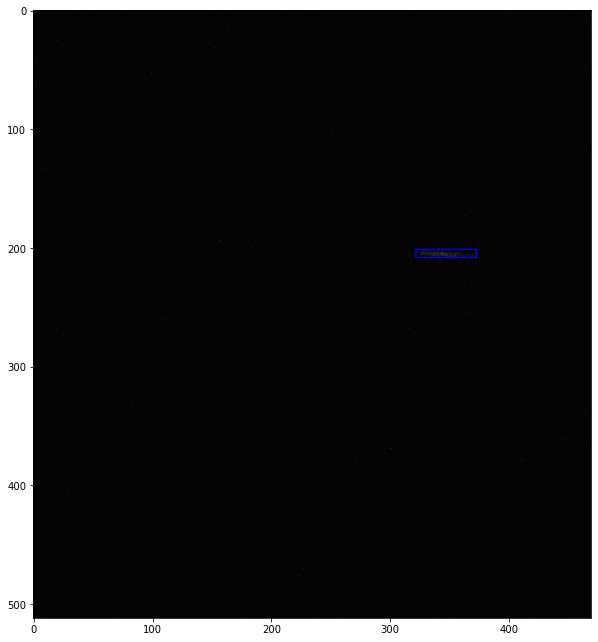

In [15]:
plt.figure(figsize=(10,15))
plt.imshow(img)
plt.show()